<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>



# Machine Learning: Laboratorio 03

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- Julio Assmann
- César Godoy
- Cristhian Solís

## Objetivo de la Tarea

El objetivo de esta tarea es aplicar diferentes algoritmos de **aprendizaje supervisado** en dos conjunto de datos **Titanic** y **load_breast_cancer**, utilizando herramientas de la librería **scikit-learn**.

## Metodología 
El análisis que se llevará a cabo incluirá las siguientes etapas, subdividos por tipo de algoritmo (supervisado)

### Para los algoritmos supervisado en este notebook: ###
Desde libreria `scikit-learn` aplicará para `fetch_openml` 

1. **Exploración de Datos:** Exploración de las características del dataset, identificación de valores faltantes y distribución de las variables.
2. **Ingeniería de Características:** Transformaciones de los datos, incluyendo imputación de valores nulos, codificación de variables categóricas y normalización de características numéricas.
3. **Aplicación y Evaluación de Algoritmos Supervisados:**
   - **Naive Bayes**
   - **Regresión Logística**
Se utilizarán métricas como **precisión**, **recall**, **matriz de confusión** y **ROC-AUC** para e valuar el rendimiento de los modelos.
4. **Análisis Específico de la Edad:** Se investigará si la edad es un factor determinante en la supervivencia.
5. **Predicción del Destino de Dos Pasajeros:** Se intentará predecir el destino de dos pasajeros con información incompleta en el dataset.
7. **Conclusiones:** Se resumirán los resultadosclave del análisis, incluyendo la importancia de la edad como factor de supervivencia.


## Algoritmos Supervisados


### 1.Exploración de los datos

El conjunto de datos **Titanic** se puede obtener utilizando la función `fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)` de la librería `scikit-learn`. Este dataset incluye información sobre **1,309 pasajeros** del Titanic y sus características relevantes para el análisis, tales como:

- Clase del boleto (1ra, 2da, 3ra clase)
- Género
- Edad
- Número de familiares a bordo
- Tarifa pagada
- Punto de embarque

El objetivo es predecir la variable **"survived"** (0 = no sobrevivió, 1 = sobrevivió).

Además, se investigará si la **edad** es un factor determinante para la supervivencia y se intentará predecir el destino de dos pasajeros con información incompleta.

***Librerias***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import lines
from matplotlib import patches


### 1. Exploración de Datos (EDA)
**1.1 Carga de los datos**  
Cargamos el dataset, verificamos la estructura de los datos y agregamos variable objetivo

In [2]:
# Cargar el dataset Titanic
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Mostrar las primeras filas del dataset
df_titanic = X.copy()
df_titanic['survived'] = y  # Agregar la variable objetivo 'survived'
df_titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


**1.2 Revisamos la información del Dataset**

Revisamos los tipos de datos y la cantidad de valores nulos para determinar si necesitamos imputar o eliminar valores faltantes.

In [3]:
# Información general sobre el dataset
df_titanic.info()

# Revisar la cantidad de valores nulos por columna
df_titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

**En base a esta descripción incial**

El dataset Titanic contiene 1,309 entradas (pasajeros) y 14 columnas. A continuación se describe cada columna, su tipo de dato y la cantidad de valores no nulos:

| **Columna**  | **Descripción** | **Tipo de Dato** | **Valores no nulos** |
|--------------|-----------------|------------------|----------------------|
| `pclass`     | Clase del boleto del pasajero (1ra, 2da, 3ra clase) | `int64` | 1309/1309 |
| `name`       | Nombre del pasajero | `object` | 1309/1309 |
| `sex`        | Género del pasajero (male/female) | `category` | 1309/1309 |
| `age`        | Edad del pasajero | `float64` | 1046/1309 |
| `sibsp`      | Número de hermanos/cónyuge a bordo | `int64` | 1309/1309 |
| `parch`      | Número de padres/hijos a bordo | `int64` | 1309/1309 |
| `ticket`     | Número del boleto | `object` | 1309/1309 |
| `fare`       | Tarifa pagada por el pasajero | `float64` | 1308/1309 |
| `cabin`      | Número de la cabina del pasajero | `object` | 295/1309 |
| `embarked`   | Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton) | `category` | 1307/1309 |
| `boat`       | Número del bote salvavidas asignado al pasajero | `object` | 486/1309 |
| `body`       | Número de identificación del cuerpo recuperado (si aplica) | `float64` | 121/1309 |
| `home.dest`  | Destino final del pasajero | `object` | 745/1309 |
| `survived`   | Indicador de supervivencia (0 = no sobrevivió, 1 = sobrevivió) | `category` | 1309/1309 |

### Tipos de Datos:
- **Categorías:** `sex`, `embarked`, y `survived` están representados como categorías.
- **Valores faltantes:** Las columnas `age`, `fare`, `cabin`, `embarked`, `boat`, `body` y `home.dest` contienen valores nulos que podrían requerir imputación o eliminación según su relevancia en el análisis.

### Resumen:
- **Variables numéricas:** `age`, `sibsp`, `parch`, `fare`, `body` (aunque esta última contiene principalmente valores nulos).
- **Variables categóricas:** `sex`, `embarked`, `survived`.
- **Variables con datos faltantes:** La columna `age` tiene aproximadamente un 20% de valores nulos, y las columnas `cabin` y `body` tienen una gran cantidad de valores faltantes, lo que podría ser relevante para su tratamiento en el análisis posterior.




**1.3 Estadísticas Descriptivas**

Calculamos estadísticas básicas para las variables numéricas, como la edad y la tarifa, para obtener una visión general de su distribución y se describe la variable objetivo (survived) para entender el equilibrio entre las clases (supervivientes y no supervivientes) incial

In [4]:
df_titanic.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
age,1046.000000,29.881135,14.413500,0.166700,21.000000,28.000000,39.000000,80.000000
sibsp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
fare,1308.000000,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.329200
body,121.000000,160.809917,97.696922,1.000000,72.000000,155.000000,256.000000,328.000000


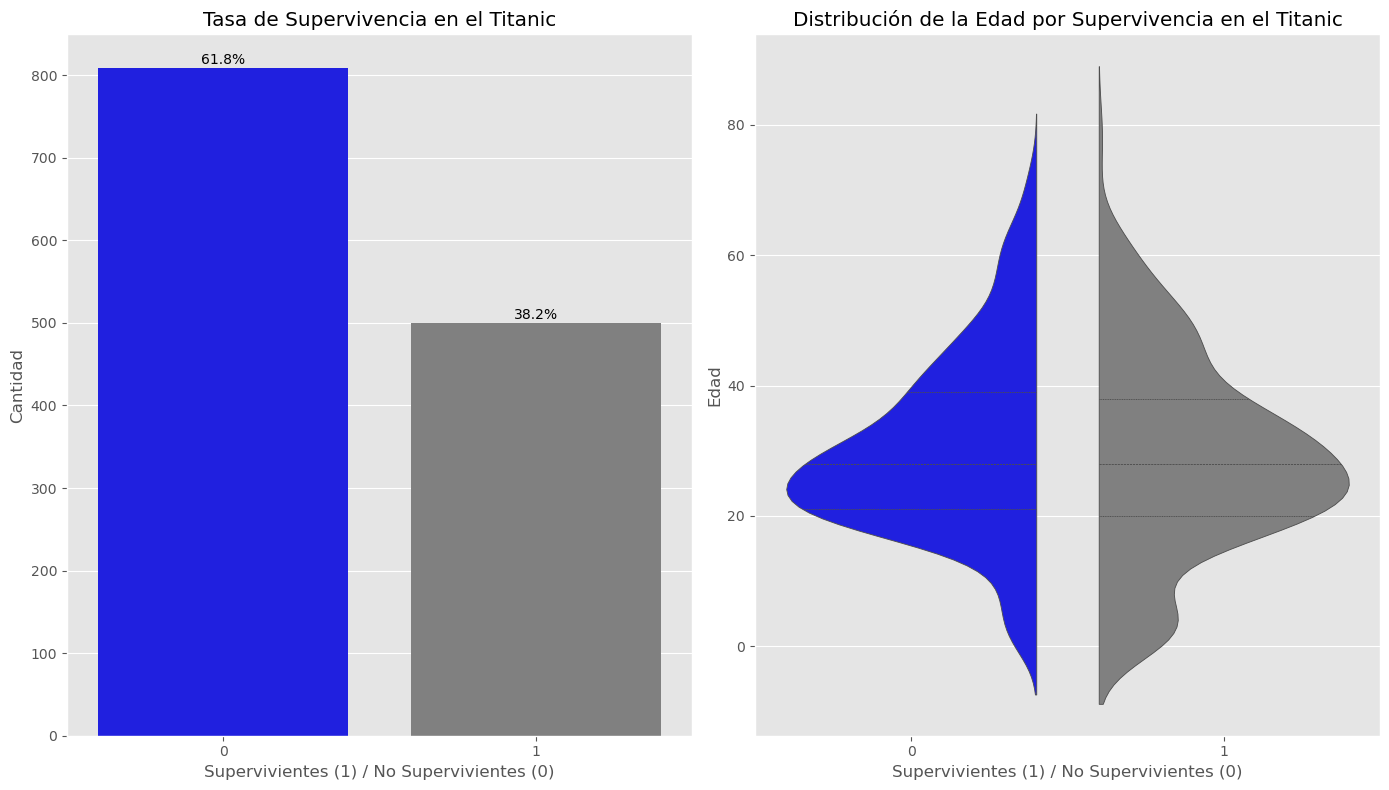

In [5]:
# Suponiendo que df_titanic ya está cargado
plt.style.use('ggplot')

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Gráfico 1: Distribución de la variable 'survived'
sns.countplot(
    x='survived', 
    data=df_titanic, 
    hue='survived', 
    palette=['blue', 'grey'], 
    ax=axes[0], 
    legend=False
)
axes[0].set_title('Tasa de Supervivencia en el Titanic')
axes[0].set_xlabel('Supervivientes (1) / No Supervivientes (0)')
axes[0].set_ylabel('Cantidad')

# Añadir porcentaje en cada barra del gráfico de 'survived'
for p in axes[0].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    axes[0].annotate('{:.1f}%'.format(height / len(df_titanic) * 100), 
                     (x + width / 2, y + height + 5), 
                     ha='center')

# Gráfico 2: Violín de 'age' por 'survived'
sns.violinplot(
    x='survived', 
    y='age', 
    data=df_titanic, 
    hue='survived', 
    palette=['blue', 'grey'], 
    split=True, 
    inner="quartile", 
    ax=axes[1]
)
axes[1].set_title('Distribución de la Edad por Supervivencia en el Titanic')
axes[1].set_xlabel('Supervivientes (1) / No Supervivientes (0)')
axes[1].set_ylabel('Edad')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

### 2. Ingeniería de Características
Transformaciones de los datos, incluyendo imputación de valores nulos, codificación de variables categóricas y normalización de características numéricas.

**2.1 Tratamiento Valores Faltantes**

Columnas con valores faltantes:

1. `age` (263 valores faltantes)
2. `fare` (1 valor faltante)
3. `cabin` (1014 valores faltantes)
4. `embarked` (2 valores faltantes)
5. `boat` (823 valores faltantes)
6. `body` (1188 valores faltantes)
7. `home.dest` (564 valores faltantes)

1. Columna `age`:

Dado que la edad puede ser una variable importante para la predicción de la supervivencia, utilizamos la media o la mediana para imputar los valores faltantes. La media es sensible a outliers, así que la mediana es a menudo una opción más robusta.

2. Columna `fare`:

Como solo falta un valor, podemos imputarlo fácilmente con la media o mediana.

3. Columna `cabin`:

La columna cabin tiene una gran cantidad de valores faltantes (1014 de 1309). Dado que esta variable probablemente tiene poca información útil, podemos eliminarla del análisis o crear una nueva variable que simplemente indique si el número de cabina es conocido o no.

4. Columna `embarked`:

Con solo dos valores faltantes, podemos imputar esta variable con el valor más común (la moda).

5. Columna `boat`:

Esta columna tiene una gran cantidad de valores faltantes, pero podría ser informativa. Se podría convertir en una variable binaria indicando si el pasajero tenía o no asignado un bote.

6. Columna `body`:

La columna body tiene una gran cantidad de valores nulos, ya que solo está completada para los pasajeros que fallecieron y cuyos cuerpos fueron recuperados (121 valores no nulos de 1309).

Imputar con 0 o NaN según el análisis: Dado que los valores nulos en body indican que el cuerpo no fue recuperado o que el pasajero sobrevivió, podemos optar por imputar los valores faltantes con un número 0 (indicando que no hay identificación de cuerpo). De esta manera, mantendremos la columna pero simplificamos el análisis.

7. Columna `home.dest`:

Esta columna describe el destino final de los pasajeros, pero tiene 564 valores nulos de 1309. Sin embargo, podría darnos una idea del contexto socioeconómico o el lugar de origen de los pasajeros, lo que puede ser relevante para las predicciones.

Imputar con una categoría 'Unknown': Dado que los valores faltantes representan pasajeros cuyo destino final no está documentado, podemos crear una nueva categoría llamada Unknown para los valores nulos.

In [6]:
# Imputar los valores faltantes de 'age' con la mediana
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())

# Imputar el valor faltante de 'fare' con la mediana
df_titanic['fare'] = df_titanic['fare'].fillna(df_titanic['fare'].median())

# Crear una nueva columna indicando si la cabina es conocida o no, y eliminar 'cabin'
df_titanic['cabin_known'] = df_titanic['cabin'].notnull().astype(int)
df_titanic.drop(columns='cabin', inplace=True)

# Imputar los valores faltantes de 'embarked' con la moda
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])

# Crear una nueva columna indicando si el pasajero tenía un bote asignado, y eliminar 'boat'
df_titanic['has_boat'] = df_titanic['boat'].notnull().astype(int)
df_titanic.drop(columns='boat', inplace=True)

# Imputar los valores faltantes de 'body' con 0
df_titanic['body'] = df_titanic['body'].fillna(0)

# Imputar los valores faltantes de 'home.dest' con 'Unknown'
df_titanic['home.dest'] = df_titanic['home.dest'].fillna('Unknown')


**2.2 Normalización de las características**

En este paso, nos centraremos en la codificación de las variables categóricas y evaluaremos si es necesario aplicar normalización o alguna otra transformación a las variables numéricas.

`A. Codificación de Variables Categóricas (Encoding)`

* Las variables categóricas no pueden ser interpretadas directamente por la mayoría de los algoritmos de machine learning. Por lo tanto, necesitamos transformarlas en valores numéricos. Vamos a utilizar One-Hot Encoding para las variables categóricas con más de dos categorías, y Label Encoding para las variables binarias.

* Variables categóricas identificadas:

    * sex: Binaria (Male/Female), se puede aplicar Label Encoding.
    * embarked: Tiene tres categorías (C, Q, S), utilizaremos One-Hot Encoding.
    * home.dest: La hemos imputado con 'Unknown' y podemos aplicar One-Hot Encoding si lo consideramos útil.

In [7]:
# Codificar la variable 'sex' con Label Encoding (Male = 1, Female = 0)
df_titanic['sex'] = df_titanic['sex'].map({'male': 1, 'female': 0})

# Aplicar One-Hot Encoding a las variables 'embarked' y 'home.dest'
df_titanic = pd.get_dummies(df_titanic, columns=['embarked', 'home.dest'], drop_first=True)

# Verificar los cambios
df_titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,body,survived,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,0.0,1,...,False,False,False,False,False,False,False,False,False,False
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,135.0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,0.0,0,...,False,False,False,False,False,False,False,False,False,False


`B. Normalización de Variables Numéricas`

Algunas variables numéricas, como fare (tarifa) y age (edad), pueden tener rangos muy diferentes. Para ciertos algoritmos (por ejemplo, Regresión Logística, Análisis Discriminante), es recomendable normalizar o escalar las variables numéricas para que todas tengan un rango similar.

Normalización consiste en escalar las variables para que sus valores queden entre 0 y 1.

In [8]:
# Normalización

#  Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Variables numéricas a normalizar
numerical_cols = ['age', 'fare']

# Aplicar la normalización a las columnas numéricas
df_titanic[numerical_cols] = scaler.fit_transform(df_titanic[numerical_cols])

# Verificar los cambios
df_titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,body,survived,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,"Allen, Miss. Elisabeth Walton",0,0.361169,0,0,24160,0.412503,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,"Allison, Master. Hudson Trevor",1,0.009395,1,2,113781,0.295806,0.0,1,...,False,False,False,False,False,False,False,False,False,False
2,1,"Allison, Miss. Helen Loraine",0,0.022964,1,2,113781,0.295806,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,"Allison, Mr. Hudson Joshua Creighton",1,0.373695,1,2,113781,0.295806,135.0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,0.311064,1,2,113781,0.295806,0.0,0,...,False,False,False,False,False,False,False,False,False,False


**2.3 Revisión Final y Verificación de Cambios**

Revisamos si hemos aplicado correctamente todas las transformaciones y si las variables están listas para ser utilizadas en los algoritmos de machine learning.

In [9]:
# Revisar los tipos de datos después del encoding y normalización
df_titanic.info()

# Revisar el resumen estadístico para asegurarse de que la normalización fue aplicada correctamente
df_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 383 entries, pclass to home.dest_Zurich, Switzerland
dtypes: bool(371), category(2), float64(3), int32(2), int64(3), object(2)
memory usage: 569.2+ KB


,pclass,age,sibsp,parch,fare,body,cabin_known,has_boat
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.367472,0.498854,0.385027,0.064960,14.864782,0.225363,0.371276
std,0.837836,0.161652,1.041658,0.865560,0.100993,55.197471,0.417981,0.483331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.273486,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000
50%,3.000000,0.348643,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000
75%,3.000000,0.436325,1.000000,0.000000,0.061045,0.000000,0.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,328.000000,1.000000,1.000000


### 3. Aplicación de Algoritmos Supervisados
En los siguientes bloques de codigos se ejecutan dos modelos supervisados **Naive Bayes** y **Regresión Logistica**



**3.1 División de dataset**

In [10]:
# División en set de entrenamiento y evaluación
from sklearn.model_selection import train_test_split
y = df_titanic['survived']
df_titanic_filtered = df_titanic.select_dtypes(include=['bool', 'float64'])
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(df_titanic_filtered, y, test_size=0.3, random_state=42)
# Verificar las dimensiones de los conjuntos
print(f"Se generó una subdivisión 70% - 30% \ncon tamaños de X_train: {X_train.shape} y X_test: {X_test.shape}\npara los conjuntos de entrenamiento y prueba.")


Se generó una subdivisión 70% - 30% 
con tamaños de X_train: (916, 374) y X_test: (393, 374)
para los conjuntos de entrenamiento y prueba.


**3.2 Naive Bayes**

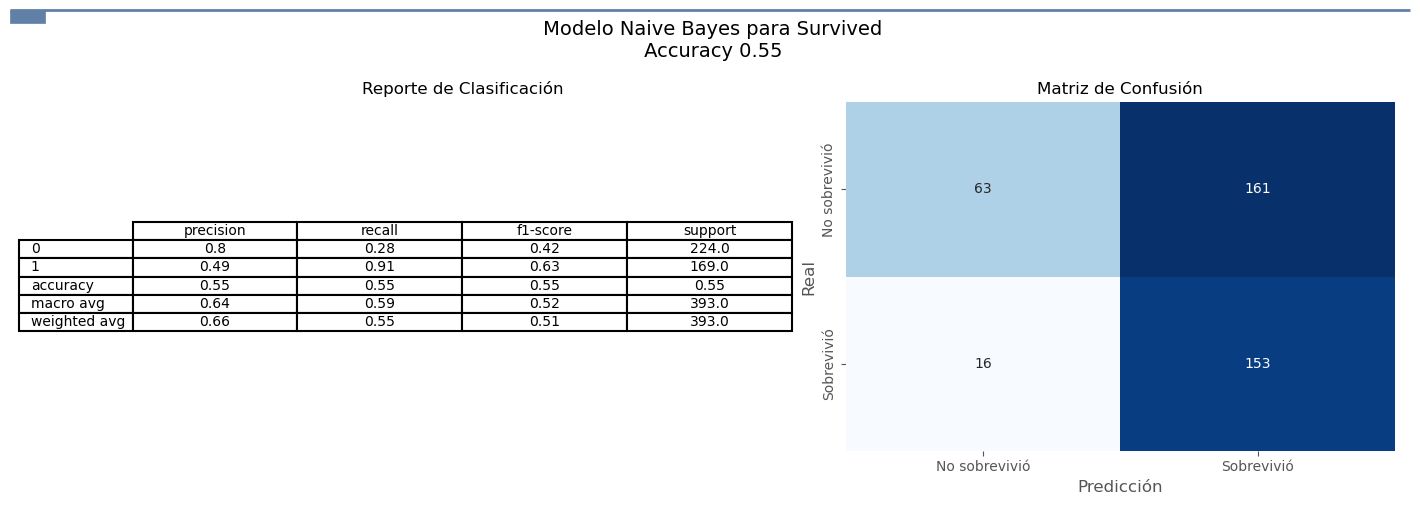

In [12]:
# Desarrollo del modelo Naive Bayes
# Variable objetivo
y = df_titanic['survived']
# DF para el modelo
df_titanic_filtered = df_titanic.select_dtypes(include=['bool', 'float64'])
# Declaración, entrenamiento, predicción y metricas del modelo
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose().round(2)

# Resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f' Modelo Naive Bayes para Survived\n Accuracy {accuracy:.2f}', fontsize=14)
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=2, color='#6080A7', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.025, 0.025, color='#6080A7'))
# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación", fontsize=12)
ax[0].axis('off')  
table = ax[0].table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center', edges='BRTL')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
for key, cell in table.get_celld().items():
    cell.set_linewidth(1.5)  # Ajustar el grosor de los bordes

# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

**3.3 Regresion logistica**

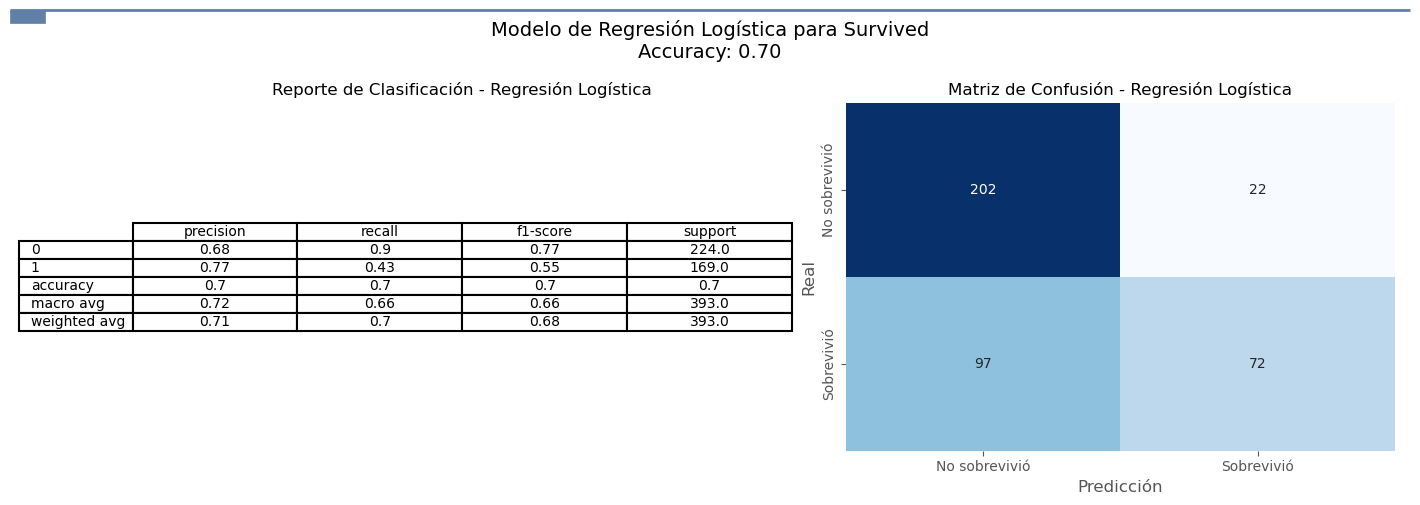

In [13]:
# Desarrollo del modelo de Regresión Logística
# Declaración, entrenamiento, predicción y metricas del modelo
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
report_df_logreg = pd.DataFrame(classification_report(y_test, y_pred_logreg, output_dict=True)).transpose().round(2)

# Resultados Regresión Logística
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Regresión Logística para Survived\nAccuracy: {accuracy_logreg:.2f}', fontsize=14)
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=2, color='#6080A7', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.025, 0.025, color='#6080A7'))
# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - Regresión Logística", fontsize=12)
ax[0].axis('off')  
table_logreg = ax[0].table(cellText=report_df_logreg.values, colLabels=report_df_logreg.columns, rowLabels=report_df_logreg.index, cellLoc='center', loc='center', edges='BRTL')
table_logreg.auto_set_font_size(False)
table_logreg.set_fontsize(10)
table_logreg.scale(1.2, 1.2)
for key, cell in table_logreg.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - Regresión Logística", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()



**3.4 Conclusiones** 

| Métrica                | Modelo de Regresión Logística | Modelo Naive Bayes  |
|------------------------|-------------------------------|---------------------|
| **Accuracy**           | 0.70                          | 0.55                |
| **Precisión (Clase 0)**| 0.68                          | 0.80                |
| **Precisión (Clase 1)**| 0.77                          | 0.49                |
| **Recall (Clase 0)**   | 0.90                          | 0.28                |
| **Recall (Clase 1)**   | 0.43                          | 0.63                |
| **Falsos Positivos**   | 22                            | 161                 |
| **Falsos Negativos**   | 97                            | 16                  |

`A. Precisión General`  
El modelo de regresión logística tiene un accuracy de 0.70, lo que indica un mejor rendimiento en comparación con el modelo de Naive Bayes, que tiene un accuracy de 0.55.

`B. Precisión y Recall`  
En el modelo de regresión logística, la precisión para la clase 1 es superior (0.77) en comparación con el modelo Naive Bayes (0.49). Sin embargo, el recall para la clase 0 es mucho mejor en el modelo de regresión logística (0.90) en comparación con Naive Bayes (0.28). Esto sugiere que la regresión logística es mejor en la identificación de los pasajeros que no sobrevivieron.

`C. Falsos Positivos y Negativos`   
La matriz de confusión muestra que el modelo de regresión logística tuvo menos falsos positivos (22) en comparación con Naive Bayes (161), lo que indica que es menos probable que clasifique incorrectamente a los pasajeros que no sobrevivieron como sobrevivientes.

`D. Rendimiento General`  
En términos generales, la regresión logística no solo ofrece un mejor rendimiento en términos de precisión y recall, sino que también maneja mejor los errores de clasificación, lo que lo convierte en un modelo más efectivo para esta tarea específica.

**Recomendación**
Para este conjunto de datos, se recomienda utilizar el modelo de regresión logística debido a su mejor desempeño general y menor tasa de errores en la predicción de la supervivencia de los pasajeros.


### FALTA ###

4. **Análisis Específico de la Edad:** Se investigará si la edad es un factor determinante en la supervivencia.
5. **Predicción del Destino de Dos Pasajeros:** Se intentará predecir el destino de dos pasajeros con información incompleta en el dataset.
7. **Conclusiones:** Se resumirán los resultadosclave del análisis, incluyendo la importancia de la edad como factor de supervivencia.